# MAKİNE ÖĞRENMESİ MODELLERİ İLE TÜRKİYE COVID19 VAKA TAHMİNLEMESİ

In [1]:
import pandas as pd
import numpy as np
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
import csv

# Güncel Veri Çekme

In [16]:
%%time
tarih=[]
toplam_test=[]
toplam_vaka=[]
toplam_vefat=[]
pneumonia=[]
agir_hasta=[]
iyilesen=[]
bugun_vaka=[]
bugun_hasta=[]
bugun_test=[]
bugun_vefat=[]
bugun_iyilesen=[]


#options = webdriver.ChromeOptions()
#options.binary_location = "C:\Program Files\Google\Chrome\Application\chrome.exe"
#chrome_driver_binary = r"C:\Users\Nafiz\Python\chromedriver_win32\chromedriver.exe"
#driver = webdriver.Chrome(chrome_driver_binary, options=options)
driver = webdriver.Chrome(ChromeDriverManager().install())

base_url = str("https://covid19.saglik.gov.tr/TR-66935/genel-koronavirus-tablosu.html")
driver.get(base_url)

rows = 1 + len(driver.find_elements_by_xpath("/html/body/form/div[3]/section[2]/div/table/tbody/tr"))


tables = WebDriverWait(driver,20).until(EC.presence_of_all_elements_located((By.XPATH,"//*[@id='TumVerileriGetir']")))

for table in tables: 

    for r in range(1, rows):
        
        tarih.append(
            driver.find_element_by_xpath("/html/body/form/div[3]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[1]").get_attribute('textContent').strip())

        toplam_test.append( 
            driver.find_element_by_xpath("/html/body/form/div[3]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[2]").get_attribute('textContent').strip())

        toplam_vaka.append(
            driver.find_element_by_xpath("/html/body/form/div[3]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[3]").get_attribute('textContent').strip())
        
        toplam_vefat.append(
            driver.find_element_by_xpath("/html/body/form/div[3]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[4]").get_attribute('textContent').strip())
        
        pneumonia.append(
            driver.find_element_by_xpath(
                "/html/body/form/div[3]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[5]").get_attribute('textContent').strip())
        
        agir_hasta.append(
            driver.find_element_by_xpath(
                "/html/body/form/div[3]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[6]").get_attribute('textContent').strip())
        
        iyilesen.append(
            driver.find_element_by_xpath(
                "/html/body/form/div[3]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[7]").get_attribute('textContent').strip())
        
        bugun_vaka.append(
            driver.find_element_by_xpath(
                "/html/body/form/div[3]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[8]").get_attribute('textContent').strip())
        
        bugun_hasta.append(
            driver.find_element_by_xpath(
                "/html/body/form/div[3]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[9]").get_attribute('textContent').strip())
        
        bugun_test.append(
            driver.find_element_by_xpath(
                "/html/body/form/div[3]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[10]").get_attribute('textContent').strip())
        
        bugun_vefat.append(
            driver.find_element_by_xpath(
                "/html/body/form/div[3]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[11]").get_attribute('textContent').strip())
        
        bugun_iyilesen.append(
            driver.find_element_by_xpath(
                "/html/body/form/div[3]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[12]").get_attribute('textContent').strip())



df = pd.DataFrame({"Tarih":tarih, 
                   "Toplam Test Sayısı":toplam_test, 
                   "Toplam Vaka Sayısı":toplam_vaka, 
                   "Toplam Vefat Sayısı":toplam_vefat,
                   "Hastalarda Zatürre Oranı (%)":pneumonia, 
                   "Ağır Hasta Sayısı":agir_hasta, 
                   "Toplam İyileşen Hasta Sayısı": iyilesen, 
                   "Bugünkü Vaka Sayısı": bugun_vaka,
                   "Bugünkü Hasta Sayısı":bugun_hasta, 
                   "Bugünkü Test Sayısı":bugun_test, 
                   "Bugünkü Vefat Sayısı":bugun_vefat, 
                   "Bugünkü İyileşen Sayısı":bugun_iyilesen})



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664
Driver [C:\Users\Nafiz\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


Wall time: 3min 6s


In [17]:
df

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,5 ARALIK 2021,,,,,,,19.357,,350.937,185,24.278
1,4 ARALIK 2021,,,,,,,20.374,,353.035,228,19.463
2,3 ARALIK 2021,,,,,,,21.495,,355.226,187,20.193
3,2 ARALIK 2021,,,,,,,21.747,,354.385,192,22.284
4,1 ARALIK 2021,,,,,,,22.556,,355.252,196,24.113
...,...,...,...,...,...,...,...,...,...,...,...,...
630,15 MART 2020,,18,,,,,,,,,
631,14 MART 2020,,6,,,,,,,,,
632,13 MART 2020,,5,,,,,,,,,
633,12 MART 2020,,1,,,,,,,,,


In [18]:
df.to_excel("covid19_data.xlsx", index=False, encoding="utf-8-sig")

In [2]:
csv = 'covid19_data.xlsx'
covid_tr = pd.read_excel(csv, thousands=".")
df = covid_tr.copy()    

# Veri İnceleme

In [3]:
df

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,5 ARALIK 2021,NaN,NaN,NaN,NaN,NaN,NaN,19357.0,NaN,350937.0,185.0,24278.0
1,4 ARALIK 2021,NaN,NaN,NaN,NaN,NaN,NaN,20374.0,NaN,353035.0,228.0,19463.0
2,3 ARALIK 2021,NaN,NaN,NaN,NaN,NaN,NaN,21495.0,NaN,355226.0,187.0,20193.0
3,2 ARALIK 2021,NaN,NaN,NaN,NaN,NaN,NaN,21747.0,NaN,354385.0,192.0,22284.0
4,1 ARALIK 2021,NaN,NaN,NaN,NaN,NaN,NaN,22556.0,NaN,355252.0,196.0,24113.0
...,...,...,...,...,...,...,...,...,...,...,...,...
630,15 MART 2020,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631,14 MART 2020,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,13 MART 2020,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,12 MART 2020,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tarih                         635 non-null    object 
 1   Toplam Test Sayısı            464 non-null    float64
 2   Toplam Vaka Sayısı            480 non-null    float64
 3   Toplam Vefat Sayısı           474 non-null    float64
 4   Hastalarda Zatürre Oranı (%)  340 non-null    object 
 5   Ağır Hasta Sayısı             340 non-null    float64
 6   Toplam İyileşen Hasta Sayısı  464 non-null    float64
 7   Bugünkü Vaka Sayısı           376 non-null    float64
 8   Bugünkü Hasta Sayısı          465 non-null    float64
 9   Bugünkü Test Sayısı           619 non-null    float64
 10  Bugünkü Vefat Sayısı          619 non-null    float64
 11  Bugünkü İyileşen Sayısı       611 non-null    float64
dtypes: float64(10), object(2)
memory usage: 59.7+ KB


In [5]:
df.isnull().sum()

Tarih                             0
Toplam Test Sayısı              171
Toplam Vaka Sayısı              155
Toplam Vefat Sayısı             161
Hastalarda Zatürre Oranı (%)    295
Ağır Hasta Sayısı               295
Toplam İyileşen Hasta Sayısı    171
Bugünkü Vaka Sayısı             259
Bugünkü Hasta Sayısı            170
Bugünkü Test Sayısı              16
Bugünkü Vefat Sayısı             16
Bugünkü İyileşen Sayısı          24
dtype: int64

# Data Tipi Değiştirme ve Eksik Verileri Doldurma

In [6]:
df["Toplam Test Sayısı"] = df["Toplam Test Sayısı"].fillna(0).astype(int)
df["Toplam Vaka Sayısı"] = df["Toplam Vaka Sayısı"].fillna(0).astype(int)

df["Toplam Vefat Sayısı"] = df["Toplam Vefat Sayısı"].fillna(0).astype(int)

df["Hastalarda Zatürre Oranı (%)"] = df["Hastalarda Zatürre Oranı (%)"].str.replace(',', '.', regex=True).fillna(0).astype(float)

df["Ağır Hasta Sayısı"] = df["Ağır Hasta Sayısı"].fillna(0).astype(int)

df["Toplam İyileşen Hasta Sayısı"] = df["Toplam İyileşen Hasta Sayısı"].fillna(0).astype(int)

df["Bugünkü Vaka Sayısı"] = df["Bugünkü Vaka Sayısı"].fillna(0).astype(int)
df["Bugünkü Hasta Sayısı"] = df["Bugünkü Hasta Sayısı"].fillna(0).astype(int)
df["Bugünkü Test Sayısı"] = df["Bugünkü Test Sayısı"].fillna(0).astype(int)
df["Bugünkü Vefat Sayısı"] = df["Bugünkü Vefat Sayısı"].fillna(0).astype(int)
df["Bugünkü İyileşen Sayısı"] = df["Bugünkü İyileşen Sayısı"].fillna(0).astype(int)

## Tarih

In [7]:
months = {'monthStr':  [' OCAK ', ' ŞUBAT ', ' MART ', ' NİSAN ', ' MAYIS ', ' HAZİRAN ', ' TEMMUZ ', ' AĞUSTOS ',' EYLÜL ',' EKİM ', ' KASIM ', ' ARALIK '],
          'monthInt': ['-01-','-02-','-03-','-04-','-05-','-06-','-07-','-08-','-09-','-10-','-11-','-12-']
         }
for i, j in df.iterrows():
    for k in range(12):
        df["Tarih"].loc[i] = df["Tarih"].loc[i].replace(months["monthStr"][k], months["monthInt"][k])

D:\C\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
import datetime

def date_convert(date_to_convert):
     return datetime.datetime.strptime(date_to_convert, "%d-%m-%Y").strftime("%Y-%m-%d")
    
df['Tarih'] = df['Tarih'].apply(date_convert)

In [9]:
df = df[::-1].reset_index(drop=True)

df['Tarih'] = pd.to_datetime(df['Tarih'], format='%Y-%m-%d')

#df['Tarih'] = pd.to_datetime(df['Tarih']).dt.date

## Günlük Vaka Sayısı Doldurulması

In [10]:
for i in range(len(df[:259])):
    if(i == 0):
        df["Bugünkü Vaka Sayısı"].loc[i] = 1
    else:
        a = df["Toplam Vaka Sayısı"].loc[i+1] - df["Toplam Vaka Sayısı"].loc[i]
        df["Bugünkü Vaka Sayısı"].loc[i+1] = a

In [11]:
df

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,2020-03-11,0,1,0,0.0,0,0,1,0,0,0,0
1,2020-03-12,0,1,0,0.0,0,0,0,0,0,0,0
2,2020-03-13,0,5,0,0.0,0,0,4,0,0,0,0
3,2020-03-14,0,6,0,0.0,0,0,1,0,0,0,0
4,2020-03-15,0,18,0,0.0,0,0,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
630,2021-12-01,0,0,0,0.0,0,0,22556,0,355252,196,24113
631,2021-12-02,0,0,0,0.0,0,0,21747,0,354385,192,22284
632,2021-12-03,0,0,0,0.0,0,0,21495,0,355226,187,20193
633,2021-12-04,0,0,0,0.0,0,0,20374,0,353035,228,19463


## Toplam Vaka Sayısı Doldurulması

In [12]:
for i in range(479, 478+len(df[479:])):
    a = df["Toplam Vaka Sayısı"].loc[i] + df["Bugünkü Vaka Sayısı"].loc[i+1]
    df["Toplam Vaka Sayısı"].loc[i+1] = a

D:\C\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
df

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,2020-03-11,0,1,0,0.0,0,0,1,0,0,0,0
1,2020-03-12,0,1,0,0.0,0,0,0,0,0,0,0
2,2020-03-13,0,5,0,0.0,0,0,4,0,0,0,0
3,2020-03-14,0,6,0,0.0,0,0,1,0,0,0,0
4,2020-03-15,0,18,0,0.0,0,0,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
630,2021-12-01,0,8818144,0,0.0,0,0,22556,0,355252,196,24113
631,2021-12-02,0,8839891,0,0.0,0,0,21747,0,354385,192,22284
632,2021-12-03,0,8861386,0,0.0,0,0,21495,0,355226,187,20193
633,2021-12-04,0,8881760,0,0.0,0,0,20374,0,353035,228,19463


## Toplam Test Sayısı Doldurulması

In [14]:
for i in range(479, 478+len(df[479:])):
    a = df["Toplam Test Sayısı"].loc[i] + df["Bugünkü Test Sayısı"].loc[i+1]
    df["Toplam Test Sayısı"].loc[i+1] = a

D:\C\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
df

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,2020-03-11,0,1,0,0.0,0,0,1,0,0,0,0
1,2020-03-12,0,1,0,0.0,0,0,0,0,0,0,0
2,2020-03-13,0,5,0,0.0,0,0,4,0,0,0,0
3,2020-03-14,0,6,0,0.0,0,0,1,0,0,0,0
4,2020-03-15,0,18,0,0.0,0,0,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
630,2021-12-01,108367680,8818144,0,0.0,0,0,22556,0,355252,196,24113
631,2021-12-02,108722065,8839891,0,0.0,0,0,21747,0,354385,192,22284
632,2021-12-03,109077291,8861386,0,0.0,0,0,21495,0,355226,187,20193
633,2021-12-04,109430326,8881760,0,0.0,0,0,20374,0,353035,228,19463


## Toplam Vefat Sayısı Doldurulması

In [16]:
for i in range(479, 478+len(df[479:])):
    a = df["Toplam Vefat Sayısı"].loc[i] + df["Bugünkü Vefat Sayısı"].loc[i+1]
    df["Toplam Vefat Sayısı"].loc[i+1] = a

D:\C\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [17]:
df

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,2020-03-11,0,1,0,0.0,0,0,1,0,0,0,0
1,2020-03-12,0,1,0,0.0,0,0,0,0,0,0,0
2,2020-03-13,0,5,0,0.0,0,0,4,0,0,0,0
3,2020-03-14,0,6,0,0.0,0,0,1,0,0,0,0
4,2020-03-15,0,18,0,0.0,0,0,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
630,2021-12-01,108367680,8818144,77038,0.0,0,0,22556,0,355252,196,24113
631,2021-12-02,108722065,8839891,77230,0.0,0,0,21747,0,354385,192,22284
632,2021-12-03,109077291,8861386,77417,0.0,0,0,21495,0,355226,187,20193
633,2021-12-04,109430326,8881760,77645,0.0,0,0,20374,0,353035,228,19463


## Toplam İyileşen Hasta Sayısı Doldurulması

In [18]:
for i in range(479, 478+len(df[479:])):
    a = df["Toplam İyileşen Hasta Sayısı"].loc[i] + df["Bugünkü İyileşen Sayısı"].loc[i+1]
    df["Toplam İyileşen Hasta Sayısı"].loc[i+1] = a

D:\C\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [19]:
df

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,2020-03-11,0,1,0,0.0,0,0,1,0,0,0,0
1,2020-03-12,0,1,0,0.0,0,0,0,0,0,0,0
2,2020-03-13,0,5,0,0.0,0,0,4,0,0,0,0
3,2020-03-14,0,6,0,0.0,0,0,1,0,0,0,0
4,2020-03-15,0,18,0,0.0,0,0,12,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
630,2021-12-01,108367680,8818144,77038,0.0,0,8350494,22556,0,355252,196,24113
631,2021-12-02,108722065,8839891,77230,0.0,0,8372778,21747,0,354385,192,22284
632,2021-12-03,109077291,8861386,77417,0.0,0,8392971,21495,0,355226,187,20193
633,2021-12-04,109430326,8881760,77645,0.0,0,8412434,20374,0,353035,228,19463


# Görselleştirmeler

In [20]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib.dates import DateFormatter

In [21]:
new_df = df.copy()
new_df.index = new_df["Tarih"]
new_df.index = pd.DatetimeIndex(new_df.index)
new_df.drop(["Tarih"], axis=1, inplace=True)

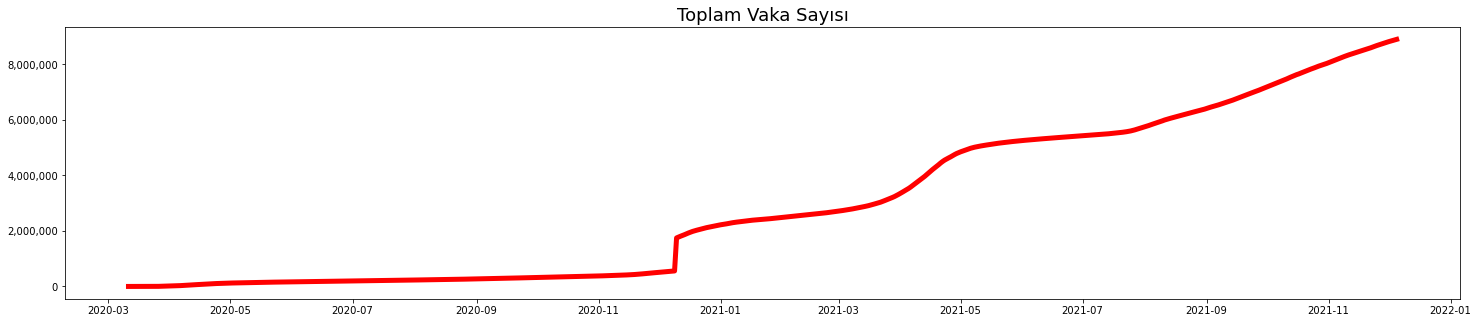

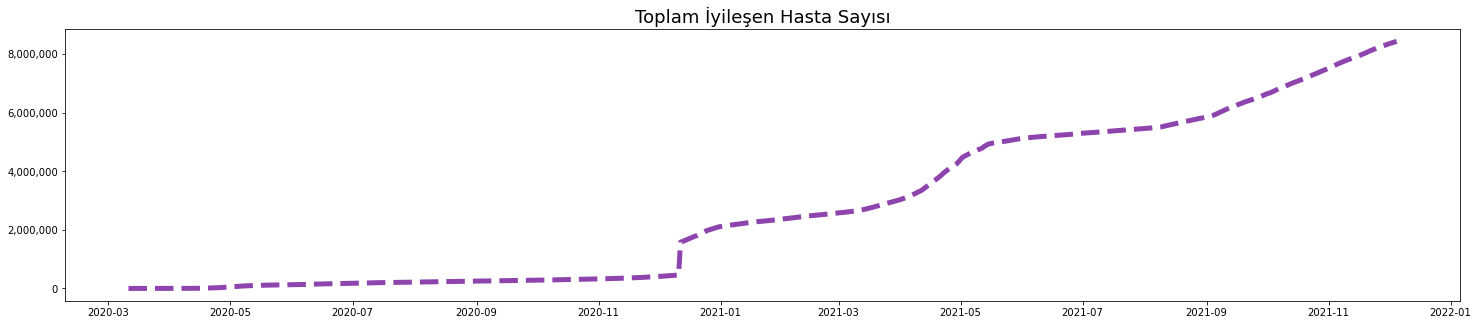

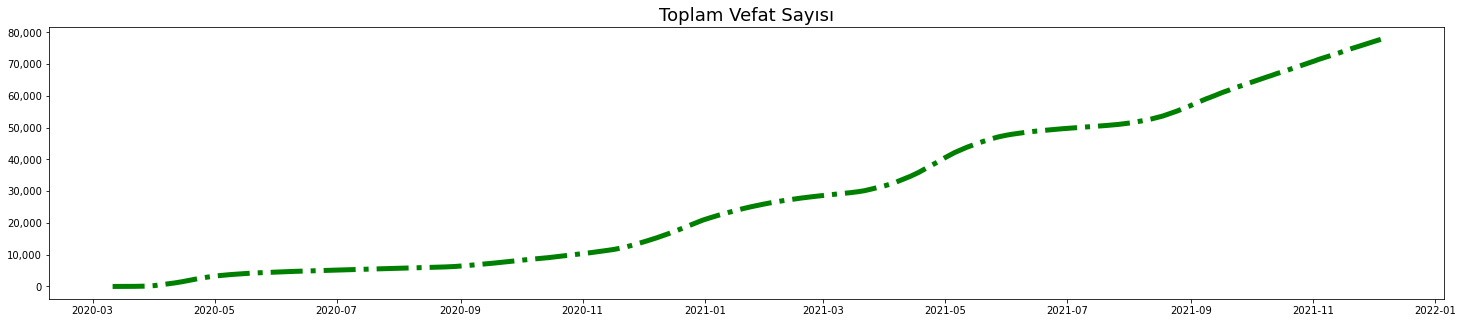

In [22]:
list_select=["Toplam Vaka Sayısı", "Toplam İyileşen Hasta Sayısı", "Toplam Vefat Sayısı"]

fig, ax = plt.subplots(figsize=(25,5))
plt.title("Toplam Vaka Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam Vaka Sayısı"],lw=5,color="#FF0000")


fig, ax = plt.subplots(figsize=(25,5))
plt.title("Toplam İyileşen Hasta Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam İyileşen Hasta Sayısı"],"--",lw=5,color="#8E44AD")


fig, ax = plt.subplots(figsize=(25,5))
plt.title("Toplam Vefat Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam Vefat Sayısı"],"-.",lw=5,color="#008000")

# MODELLER

## SARIMAX

In [23]:
from statsmodels.tsa.stattools import adfuller
def testStationarity(ts):
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

In [24]:
print("Bugünkü Vaka Sayısı")
print(testStationarity(new_df["Bugünkü Vaka Sayısı"]))

print("Bugünkü Hasta Sayısı")
print(testStationarity(new_df["Bugünkü Hasta Sayısı"]))

print("Bugünkü Vefat Sayısı")
print(testStationarity(new_df["Bugünkü Vefat Sayısı"]))

Bugünkü Vaka Sayısı
Test Statistic                  -3.157217
p-value                          0.022599
#Lags Used                      16.000000
Number of Observations Used    618.000000
Critical Value (1%)             -3.440976
Critical Value (5%)             -2.866228
Critical Value (10%)            -2.569267
dtype: float64
Bugünkü Hasta Sayısı
Test Statistic                  -2.781722
p-value                          0.060932
#Lags Used                      18.000000
Number of Observations Used    616.000000
Critical Value (1%)             -3.441010
Critical Value (5%)             -2.866243
Critical Value (10%)            -2.569275
dtype: float64
Bugünkü Vefat Sayısı
Test Statistic                  -3.929962
p-value                          0.001825
#Lags Used                      16.000000
Number of Observations Used    618.000000
Critical Value (1%)             -3.440976
Critical Value (5%)             -2.866228
Critical Value (10%)            -2.569267
dtype: float64


In [25]:
df.corr()

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
Toplam Test Sayısı,1.000000,0.990696,0.995456,-0.310794,-0.190968,0.989129,0.598693,-0.499274,0.938155,0.599432,0.609562
Toplam Vaka Sayısı,0.990696,1.000000,0.996370,-0.357018,-0.194564,0.999007,0.603686,-0.521445,0.924927,0.615954,0.642629
Toplam Vefat Sayısı,0.995456,0.996370,1.000000,-0.331670,-0.176590,0.996259,0.593852,-0.510898,0.933356,0.601888,0.616952
Hastalarda Zatürre Oranı (%),-0.310794,-0.357018,-0.331670,1.000000,0.120587,-0.355285,-0.299058,0.107402,-0.227921,-0.246722,-0.275436
Ağır Hasta Sayısı,-0.190968,-0.194564,-0.176590,0.120587,1.000000,-0.205794,0.313780,0.712733,0.077360,0.428266,0.248689
Toplam İyileşen Hasta Sayısı,0.989129,0.999007,0.996259,-0.355285,-0.205794,1.000000,0.578450,-0.535420,0.915132,0.593802,0.622672
Bugünkü Vaka Sayısı,0.598693,0.603686,0.593852,-0.299058,0.313780,0.578450,1.000000,0.077655,0.770198,0.806272,0.829465
Bugünkü Hasta Sayısı,-0.499274,-0.521445,-0.510898,0.107402,0.712733,-0.535420,0.077655,1.000000,-0.286653,0.136039,-0.060396
Bugünkü Test Sayısı,0.938155,0.924927,0.933356,-0.227921,0.077360,0.915132,0.770198,-0.286653,1.000000,0.760602,0.736304
Bugünkü Vefat Sayısı,0.599432,0.615954,0.601888,-0.246722,0.428266,0.593802,0.806272,0.136039,0.760602,1.000000,0.856370


### GÜNLÜK VAKA SAYISI

In [26]:
#!pip install pmdarima

In [27]:
from pmdarima.arima import auto_arima
import statsmodels.api as sm

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.85 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=11492.853, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=11302.329, Time=1.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=11485.356, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=11214.686, Time=3.01 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.45 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.14 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=11242.675, Time=0.69 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=11211.601, Time=2.66 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=11291.285, Time=1.11 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.06 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.78 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=11212.271, Time=3.76 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AI

D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


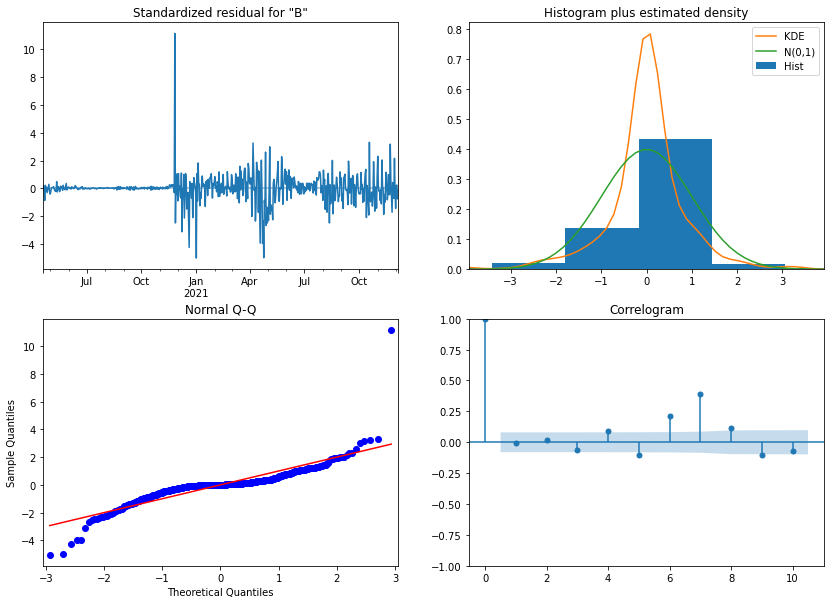

In [28]:
b_vaka_df = new_df["Bugünkü Vaka Sayısı"]
b_vaka_df = pd.DataFrame(b_vaka_df)

results = auto_arima(b_vaka_df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', 
                     suppress_warnings=True, stepwise=True)


mod = sm.tsa.statespace.SARIMAX(b_vaka_df,
                                order=results.order,
                                seasonal_order=results.seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_vaka = mod.fit()


results_vaka.plot_diagnostics(figsize=(14,10))
plt.show()

### GÜNLÜK HASTA SAYISI

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.24 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8722.101, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=8515.565, Time=0.42 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=8724.051, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=8448.342, Time=0.94 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.06 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.98 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=8454.259, Time=0.65 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=8444.352, Time=0.95 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=8510.893, Time=0.52 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.45 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.25 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=8445.471, Time=1.16 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=8432.7

D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


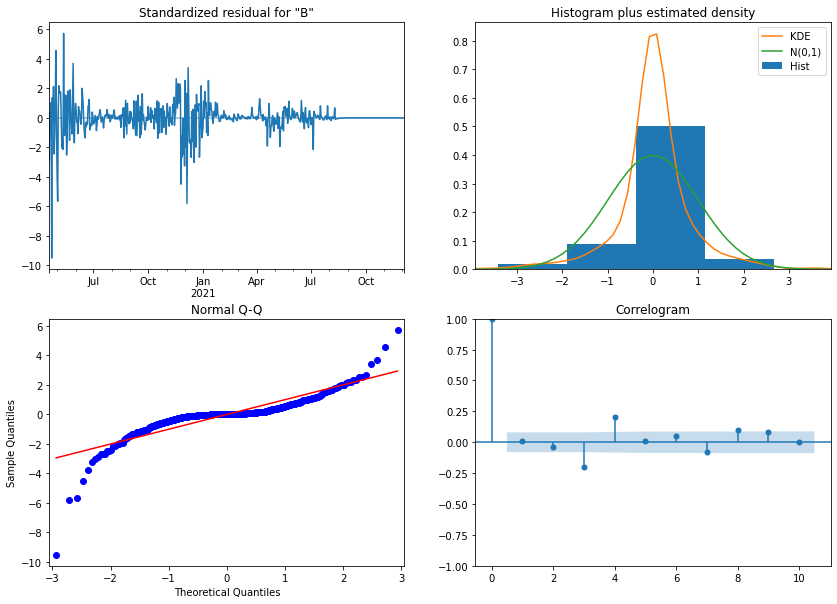

In [29]:
b_hasta_df = new_df["Bugünkü Hasta Sayısı"]
b_hasta_df = pd.DataFrame(b_hasta_df)

results = auto_arima(b_hasta_df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', 
                     suppress_warnings=True, stepwise=True)

mod = sm.tsa.statespace.SARIMAX(b_hasta_df,
                                order=results.order,
                                seasonal_order=results.seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_hasta = mod.fit()

results_hasta.plot_diagnostics(figsize=(14,10))
plt.show()

### GÜNLÜK VEFAT SAYISI

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5281.726, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5125.497, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.56 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5240.403, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5038.860, Time=0.51 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.32 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.15 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5063.892, Time=0.35 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=5037.670, Time=0.58 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=5121.413, Time=0.31 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=3.77 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.59 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=5034.248, Time=0.79 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=5123.3

D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


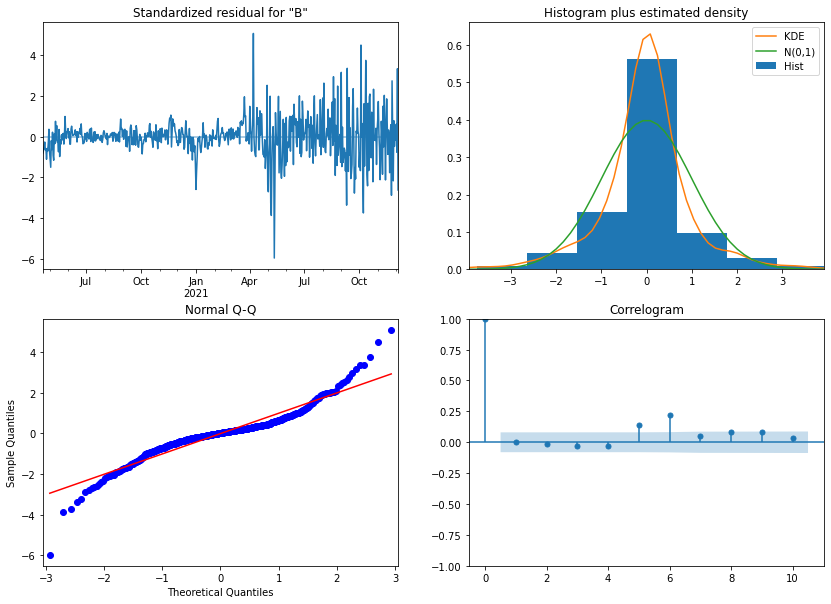

In [30]:
b_vefat_df = new_df["Bugünkü Vefat Sayısı"]
b_vefat_df = pd.DataFrame(b_vefat_df)

results = auto_arima(b_vefat_df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', 
                     suppress_warnings=True, stepwise=True)

mod = sm.tsa.statespace.SARIMAX(b_vefat_df,
                                order=results.order,
                                seasonal_order=results.seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_vefat = mod.fit()


results_vefat.plot_diagnostics(figsize=(14,10))
plt.show()

### GERÇEK VE ÖNGÖRÜLEN DEĞERLERİN KARŞILAŞTIRILMASI

In [31]:
#BUGÜNKÜ VAKA SAYISI
pred_vaka = results_vaka.get_prediction(start = pd.to_datetime('2020-03-11'), dynamic=False)
pred_vaka_ci = pred_vaka.conf_int()

pred_vaka_ci['Predicted'] = (pred_vaka_ci['lower Bugünkü Vaka Sayısı'] + pred_vaka_ci['upper Bugünkü Vaka Sayısı'])/2
pred_vaka_ci['Observed'] = b_vaka_df['Bugünkü Vaka Sayısı']
pred_vaka_ci['Diff, %%'] = ((pred_vaka_ci['Predicted'] / pred_vaka_ci['Observed'])-1) * 100
pred_vaka_ci.head()

,lower Bugünkü Vaka Sayısı,upper Bugünkü Vaka Sayısı,Predicted,Observed,"Diff, %%"
2020-03-11,-3394.757202,3394.757202,0.000000,1,-100.000000
2020-03-12,-4825.766908,4827.935243,1.084168,0,inf
2020-03-13,-4833.016830,4832.547096,-0.234867,4,-105.871679
2020-03-14,-4828.320734,4838.111640,4.895453,1,389.545298
2020-03-15,-4833.103216,4833.336674,0.116729,12,-99.027257


In [32]:
#BUGÜNKÜ HASTA SAYISI
pred_hasta = results_hasta.get_prediction(start=pd.to_datetime('2020-03-11'), dynamic=False)
pred_hasta_ci = pred_hasta.conf_int()

pred_hasta_ci['Predicted'] = (pred_hasta_ci['lower Bugünkü Hasta Sayısı'] + pred_hasta_ci['upper Bugünkü Hasta Sayısı'])/2
pred_hasta_ci['Observed'] = b_hasta_df['Bugünkü Hasta Sayısı']
pred_hasta_ci['Diff, %%'] = ((pred_hasta_ci['Predicted'] / pred_hasta_ci['Observed'])-1) * 100
pred_hasta_ci.head()

,lower Bugünkü Hasta Sayısı,upper Bugünkü Hasta Sayısı,Predicted,Observed,"Diff, %%"
2020-03-11,-3394.757202,3394.757202,0.0,0,NaN
2020-03-12,-3172.317219,3172.317219,0.0,0,NaN
2020-03-13,-3148.102738,3148.102738,0.0,0,NaN
2020-03-14,-3144.748336,3144.748336,0.0,0,NaN
2020-03-15,-3144.277248,3144.277248,0.0,0,NaN


In [33]:
#BUGÜNKÜ VEFAT SAYISI
pred_vefat = results_vefat.get_prediction(start=pd.to_datetime('2020-03-11'), dynamic=False)
pred_vefat_ci = pred_vefat.conf_int()

pred_vefat_ci['Predicted'] = (pred_vefat_ci['lower Bugünkü Vefat Sayısı'] + pred_vefat_ci['upper Bugünkü Vefat Sayısı'])/2
pred_vefat_ci['Observed'] = b_vefat_df['Bugünkü Vefat Sayısı']
pred_vefat_ci['Diff, %%'] = ((pred_vefat_ci['Predicted'] / pred_vefat_ci['Observed'])-1) * 100
pred_vefat_ci.head()

,lower Bugünkü Vefat Sayısı,upper Bugünkü Vefat Sayısı,Predicted,Observed,"Diff, %%"
2020-03-11,-3394.757202,3394.757202,0.0,0,NaN
2020-03-12,-2794.666171,2794.666171,0.0,0,NaN
2020-03-13,-2789.440510,2789.440510,0.0,0,NaN
2020-03-14,-2794.414744,2794.414744,0.0,0,NaN
2020-03-15,-2793.376956,2793.376956,0.0,0,NaN


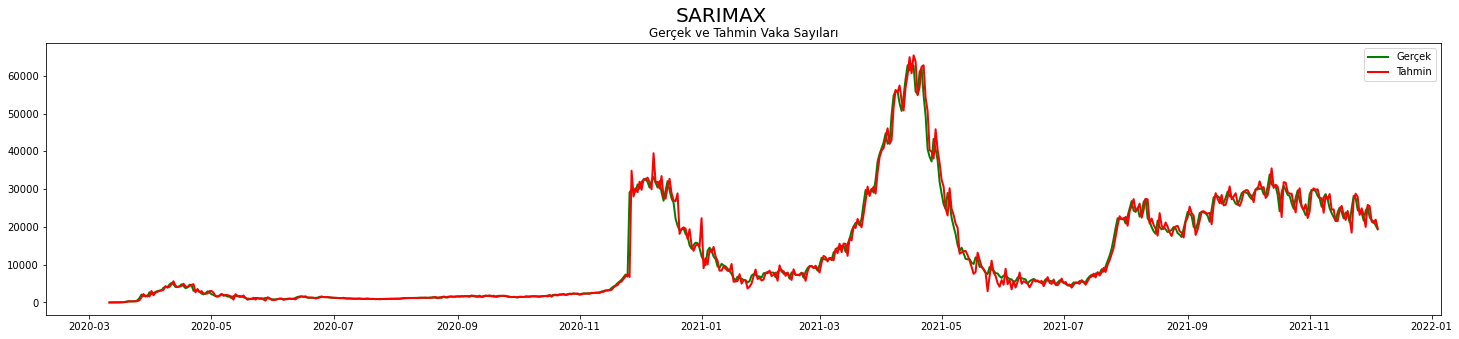

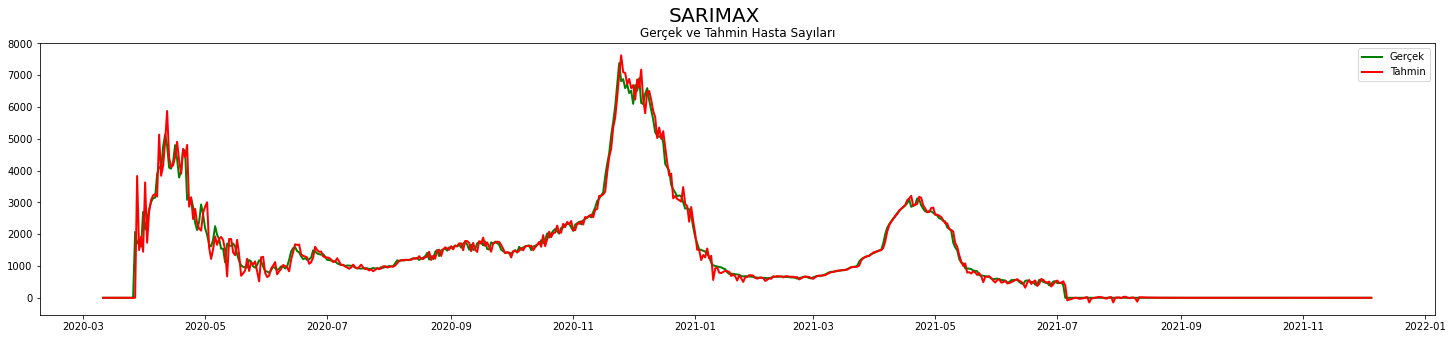

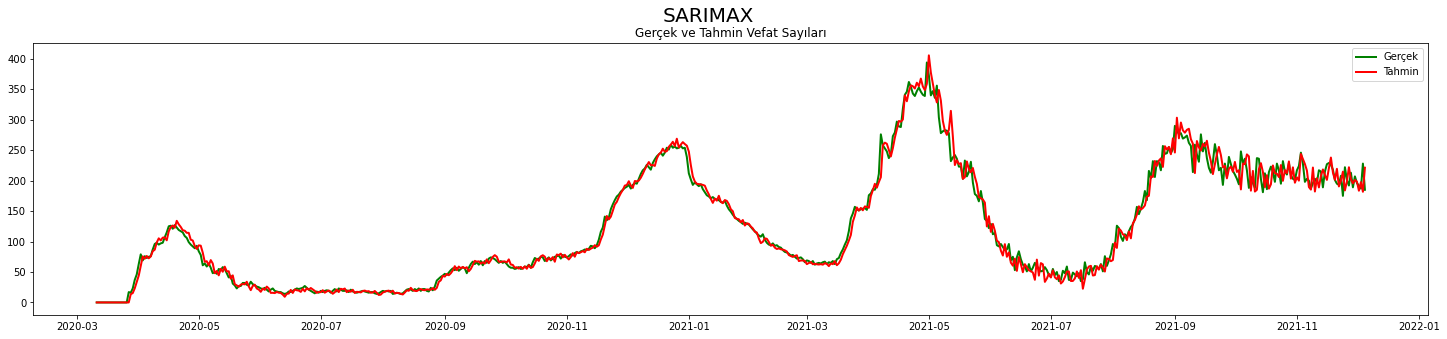

In [34]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
plt.title("Gerçek ve Tahmin Vaka Sayıları")
ax.plot(pred_vaka_ci['Observed'],lw=2,color="#008000")
ax.plot(pred_vaka_ci['Predicted'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/SARIMAX.png')

fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
plt.title("Gerçek ve Tahmin Hasta Sayıları")
ax.plot(pred_hasta_ci['Observed'],lw=2,color="#008000")
ax.plot(pred_hasta_ci['Predicted'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
plt.title("Gerçek ve Tahmin Vefat Sayıları")
ax.plot(pred_vefat_ci['Observed'],lw=2,color="#008000")
ax.plot(pred_vefat_ci['Predicted'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
plt.show()

### İLERİ TARİHLİ TAHMİNLEME

In [35]:
from dateutil.relativedelta import relativedelta

In [36]:
#BUGÜNKÜ VAKA SAYISI
pred_vaka = results_vaka.get_forecast(steps=4)

value = pred_vaka.predicted_mean.copy() 
value.index = pd.DatetimeIndex([(pd.to_datetime("today") + relativedelta(months = 1)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 2)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 3)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 4)).strftime("%Y-%m-%d")])
value = pd.DataFrame(value)
value.columns = ["Vaka Tahmin"]

deneme = value.copy()
deneme.columns=["Bugünkü Vaka Sayısı"]
dff_vaka = pd.concat([b_vaka_df, deneme])

In [37]:
#BUGÜNKÜ HASTA SAYISI
pred_hasta = results_hasta.get_forecast(steps=4)

value = pred_hasta.predicted_mean.copy() 
value.index = pd.DatetimeIndex([(pd.to_datetime("today") + relativedelta(months = 1)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 2)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 3)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 4)).strftime("%Y-%m-%d")])
value = pd.DataFrame(value)
value.columns = ["Hasta Tahmin"]

deneme = value.copy()
deneme.columns=["Bugünkü Hasta Sayısı"]
dff_hasta = pd.concat([b_hasta_df, deneme])

In [38]:
#BUGÜNKÜ VEFAT SAYISI
pred_vefat = results_vefat.get_forecast(steps=4)

value = pred_vefat.predicted_mean.copy() 
value.index = pd.DatetimeIndex([(pd.to_datetime("today") + relativedelta(months = 1)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 2)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 3)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 4)).strftime("%Y-%m-%d")])
value = pd.DataFrame(value)
value.columns = ["Vefat Tahmin"]

deneme = value.copy()
deneme.columns=["Bugünkü Vefat Sayısı"]
dff_vefat = pd.concat([b_vefat_df, deneme])

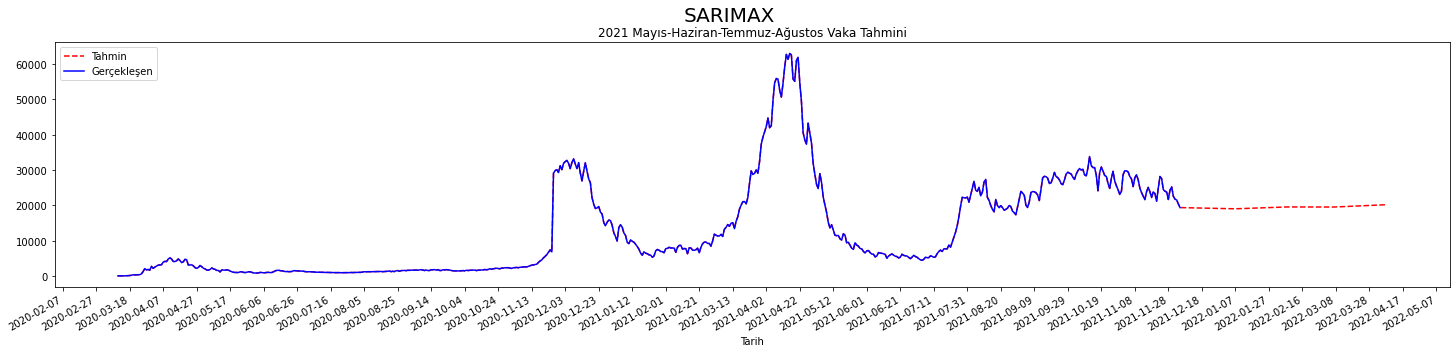

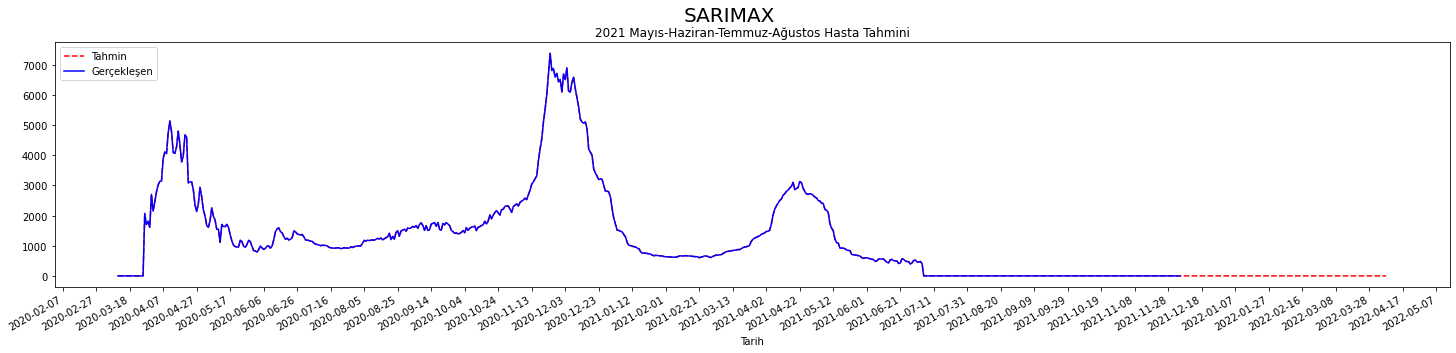

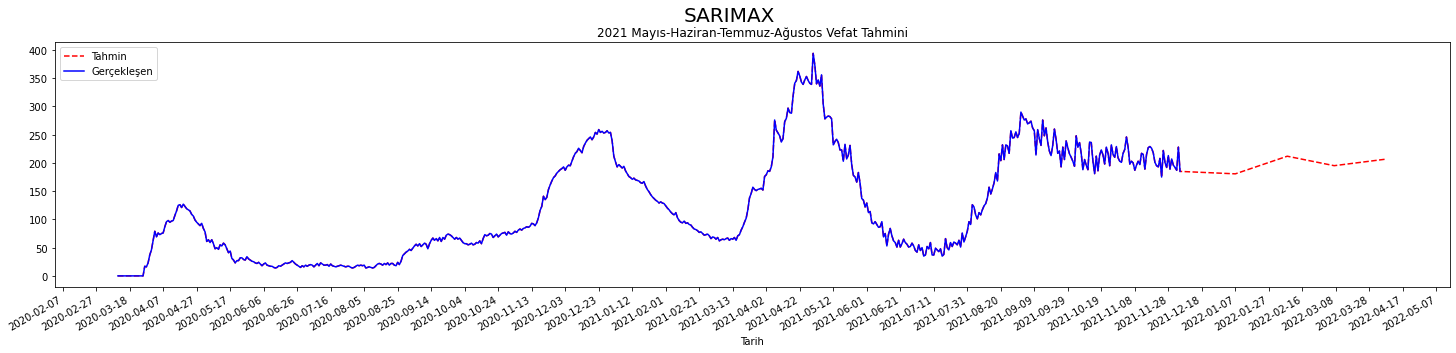

In [39]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
dff_vaka["Bugünkü Vaka Sayısı"].plot(title = "2021 Mayıs-Haziran-Temmuz-Ağustos Vaka Tahmini", color = "r", marker = ".", ms=0, ls="--")
b_vaka_df["Bugünkü Vaka Sayısı"].plot(color = "b" , marker = ".", ms = 0, ls = "-")
plt.legend(["Tahmin","Gerçekleşen"], loc="upper left")


fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
dff_hasta["Bugünkü Hasta Sayısı"].plot(title = "2021 Mayıs-Haziran-Temmuz-Ağustos Hasta Tahmini", color = "r", marker = ".", ms=0, ls="--")
b_hasta_df["Bugünkü Hasta Sayısı"].plot(color = "b" , marker = ".", ms = 0, ls = "-")
plt.legend(["Tahmin","Gerçekleşen"], loc="upper left")


fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
dff_vefat["Bugünkü Vefat Sayısı"].plot(title = "2021 Mayıs-Haziran-Temmuz-Ağustos Vefat Tahmini", color = "r", marker = ".", ms=0, ls="--")
b_vefat_df["Bugünkü Vefat Sayısı"].plot(color = "b" , marker = ".", ms = 0, ls = "-")
plt.legend(["Tahmin","Gerçekleşen"], loc="upper left")

In [40]:
sarimax_rmse = np.sqrt(results_vaka.mse)
sarimax_mae = results_vaka.mae

print("RMSE :", sarimax_rmse)
print("MAE :", sarimax_mae)

RMSE : 1945.5672124466373
MAE : 1042.6675507622085


## MAKİNE ÖĞRENMESİ

In [41]:
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [42]:
ml_df = df.copy()
ml_df['Tarih'] = pd.to_datetime(ml_df['Tarih'], format='%Y-%m-%d')
ml_df['Gün'] = ml_df['Tarih'].dt.day
ml_df['Ay'] = ml_df['Tarih'].dt.month
ml_df['Yıl'] = ml_df['Tarih'].dt.year

ml_df.index = ml_df["Tarih"]
ml_df.index = pd.DatetimeIndex(ml_df.index)
ml_df.drop(["Tarih"], axis=1, inplace=True)
ml_df.head()

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı,Gün,Ay,Yıl
Tarih,,,,,,,,,,,,,,
2020-03-11,0,1,0,0.0,0,0,1,0,0,0,0,11,3,2020
2020-03-12,0,1,0,0.0,0,0,0,0,0,0,0,12,3,2020
2020-03-13,0,5,0,0.0,0,0,4,0,0,0,0,13,3,2020
2020-03-14,0,6,0,0.0,0,0,1,0,0,0,0,14,3,2020
2020-03-15,0,18,0,0.0,0,0,12,0,0,0,0,15,3,2020


In [43]:
ml_df.corr()

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı,Gün,Ay,Yıl
Toplam Test Sayısı,1.000000,0.990696,0.995456,-0.310794,-0.190968,0.989129,0.598693,-0.499274,0.938155,0.599432,0.609562,-0.001912,0.295741,0.818424
Toplam Vaka Sayısı,0.990696,1.000000,0.996370,-0.357018,-0.194564,0.999007,0.603686,-0.521445,0.924927,0.615954,0.642629,0.000248,0.209524,0.854969
Toplam Vefat Sayısı,0.995456,0.996370,1.000000,-0.331670,-0.176590,0.996259,0.593852,-0.510898,0.933356,0.601888,0.616952,-0.003392,0.238295,0.855199
Hastalarda Zatürre Oranı (%),-0.310794,-0.357018,-0.331670,1.000000,0.120587,-0.355285,-0.299058,0.107402,-0.227921,-0.246722,-0.275436,-0.041441,0.265183,-0.375810
Ağır Hasta Sayısı,-0.190968,-0.194564,-0.176590,0.120587,1.000000,-0.205794,0.313780,0.712733,0.077360,0.428266,0.248689,-0.011896,0.117242,-0.082430
Toplam İyileşen Hasta Sayısı,0.989129,0.999007,0.996259,-0.355285,-0.205794,1.000000,0.578450,-0.535420,0.915132,0.593802,0.622672,0.001256,0.202026,0.857680
Bugünkü Vaka Sayısı,0.598693,0.603686,0.593852,-0.299058,0.313780,0.578450,1.000000,0.077655,0.770198,0.806272,0.829465,-0.021640,0.140544,0.560450
Bugünkü Hasta Sayısı,-0.499274,-0.521445,-0.510898,0.107402,0.712733,-0.535420,0.077655,1.000000,-0.286653,0.136039,-0.060396,-0.004206,0.162095,-0.523027
Bugünkü Test Sayısı,0.938155,0.924927,0.933356,-0.227921,0.077360,0.915132,0.770198,-0.286653,1.000000,0.760602,0.736304,-0.001116,0.356051,0.776202
Bugünkü Vefat Sayısı,0.599432,0.615954,0.601888,-0.246722,0.428266,0.593802,0.806272,0.136039,0.760602,1.000000,0.856370,0.008755,0.180104,0.539774


In [44]:
X = ml_df.drop(["Bugünkü Vaka Sayısı"], axis=1)
y = ml_df["Bugünkü Vaka Sayısı"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [45]:
pred_vaka_ci = pred_vaka_ci[pred_vaka_ci.index.isin(y_test.index)]

### XGBOOST

In [46]:
import xgboost as xg

In [47]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 20, seed = 123)
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=8, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [48]:
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_r.predict(X_test)))
xgb_mae = mean_absolute_error(y_test, xgb_r.predict(X_test))

print("RMSE :", xgb_rmse)
print("MAE :", xgb_mae)

RMSE : 1499.2517240840136
MAE : 844.1138526736282


D:\C\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\C\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [49]:
xgb_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": xgb_r.predict(X_test)}).sort_index()
xgb_tahmin_df

D:\C\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,98.040909
2020-03-19,168,174.510941
2020-03-21,277,328.514313
2020-03-23,293,328.514313
2020-03-25,561,390.296539
...,...,...
2021-11-22,24856,24964.773438
2021-11-27,23759,24039.212891
2021-11-28,21655,21957.203125


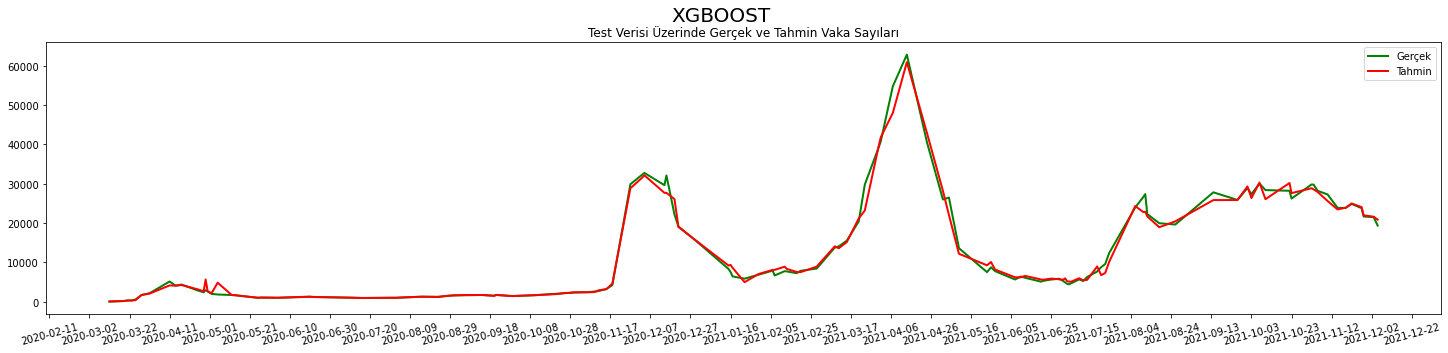

In [50]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('XGBOOST', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 15)
ax.plot(xgb_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(xgb_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/XGBoost.png')

### LINEAR REGRESSION

In [51]:
sklearn_model = LinearRegression().fit(X_train,y_train)

In [52]:
sklearn_rmse = np.sqrt(mean_squared_error(y_test, sklearn_model.predict(X_test)))
sklearn_mae = mean_absolute_error(y_test, sklearn_model.predict(X_test))

print("RMSE :", sklearn_rmse)
print("MAE :", sklearn_mae)

RMSE : 4330.625296477676
MAE : 3183.3339603219592


In [53]:
sklearn_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": sklearn_model.predict(X_test)}).sort_index()
sklearn_tahmin_df

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,-2715.429031
2020-03-19,168,-2980.180281
2020-03-21,277,-3064.071976
2020-03-23,293,-3146.887040
2020-03-25,561,-3229.700563
...,...,...
2021-11-22,24856,25753.974845
2021-11-27,23759,23174.318107
2021-11-28,21655,18979.687194


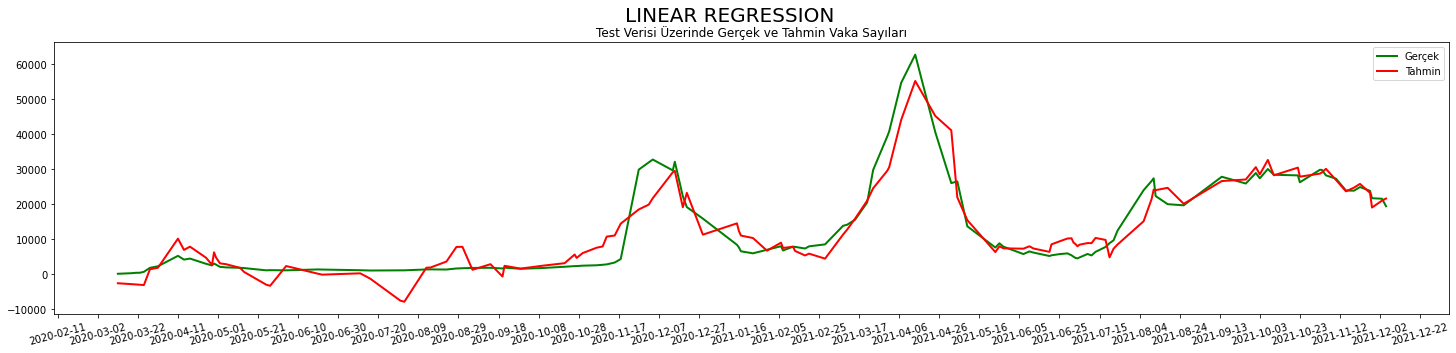

In [54]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('LINEAR REGRESSION', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 15)
ax.plot(sklearn_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(sklearn_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/Sklearn.png')

### DESICION TREE REGRESSOR

In [55]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor().fit(X_train,y_train)

In [56]:
dt_regressor_rmse = np.sqrt(mean_squared_error(y_test, dt_regressor.predict(X_test)))
dt_regressor_mae = mean_absolute_error(y_test, dt_regressor.predict(X_test))

print("RMSE :", dt_regressor_rmse)
print("MAE :", dt_regressor_mae)

RMSE : 1595.7058122881167
MAE : 853.3700787401575


In [57]:
dt_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": dt_regressor.predict(X_test)}).sort_index()
dt_tahmin_df

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,1.0
2020-03-19,168,93.0
2020-03-21,277,289.0
2020-03-23,293,289.0
2020-03-25,561,343.0
...,...,...
2021-11-22,24856,24467.0
2021-11-27,23759,24317.0
2021-11-28,21655,21624.0


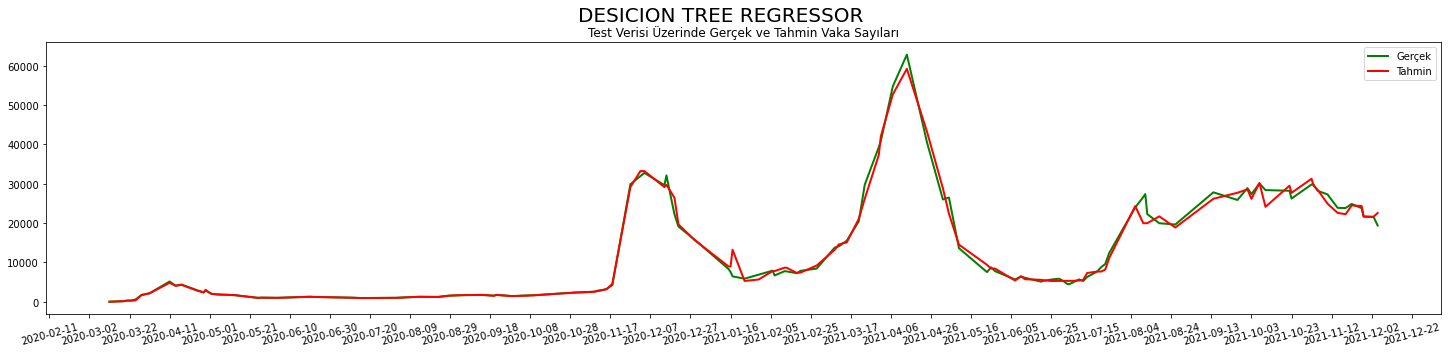

In [58]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('DESICION TREE REGRESSOR', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 15)
ax.plot(dt_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(dt_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/DecisionTree.png')

### ARTIFICIAL DEEP NEURAL NETWORK

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [60]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = X_train, X_test, y_train, y_test

In [61]:
scaler = MinMaxScaler()

X_train_tf = scaler.fit_transform(X_train_tf)
X_test_tf = scaler.transform(X_test_tf)

In [62]:
tf_model = Sequential()

tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))

tf_model.add(Dense(1))

tf_model.compile(optimizer = "adam", loss = "mse")

tf_model.fit(x = X_train_tf, y = y_train_tf, validation_data = (X_test_tf, y_test_tf), batch_size = 5, epochs = 500)

Epoch 1/500
102/102 [==============================] - 12s 58ms/step - loss: 375389491.5728 - val_loss: 308134944.0000
Epoch 2/500
102/102 [==============================] - 1s 10ms/step - loss: 255720751.6893 - val_loss: 100666888.0000
Epoch 3/500
102/102 [==============================] - 1s 9ms/step - loss: 125471536.3883 - val_loss: 92982824.0000
Epoch 4/500
102/102 [==============================] - 1s 9ms/step - loss: 79455640.5922 - val_loss: 76704368.0000
Epoch 5/500
102/102 [==============================] - 1s 9ms/step - loss: 73181977.2039 - val_loss: 83646344.0000
Epoch 6/500
102/102 [==============================] - 1s 10ms/step - loss: 67981604.8155 - val_loss: 57622000.0000
Epoch 7/500
102/102 [==============================] - 1s 9ms/step - loss: 61971056.6602 - val_loss: 46147200.0000
Epoch 8/500
102/102 [==============================] - 1s 9ms/step - loss: 52405967.1068 - val_loss: 43633184.0000
Epoch 9/500
102/102 [==============================] - 1s 9ms/step - lo

<AxesSubplot:>

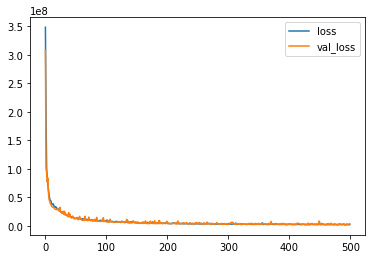

In [63]:
kayipVeri = pd.DataFrame(tf_model.history.history)
kayipVeri.plot()

In [64]:
tahmin_dizi = tf_model.predict(X_test_tf)

trainLoss = tf_model.evaluate(X_train_tf, y_train_tf, verbose = 0)
testLoss = tf_model.evaluate(X_test_tf, y_test_tf, verbose = 0)

print("Train Loss : ", trainLoss)
print("Test Loss : ", testLoss)

Train Loss :  3140002.5
Test Loss :  3658595.5


In [65]:
tf_rmse = np.sqrt(mean_squared_error(y_test_tf, tf_model.predict(X_test_tf)))
tf_mae = mean_absolute_error(y_test_tf, tf_model.predict(X_test_tf))

print("RMSE :", tf_rmse)
print("MAE :", tf_mae)

RMSE : 1912.7456022871384
MAE : 1200.8370847927304


In [66]:
tf_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test_tf, "Tahmin Vaka Test": tf_model.predict(X_test_tf).reshape(-1)}).sort_index()
tf_tahmin_df

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,220.561050
2020-03-19,168,205.946762
2020-03-21,277,201.589432
2020-03-23,293,200.738052
2020-03-25,561,200.729935
...,...,...
2021-11-22,24856,28375.654297
2021-11-27,23759,26862.257812
2021-11-28,21655,24317.984375


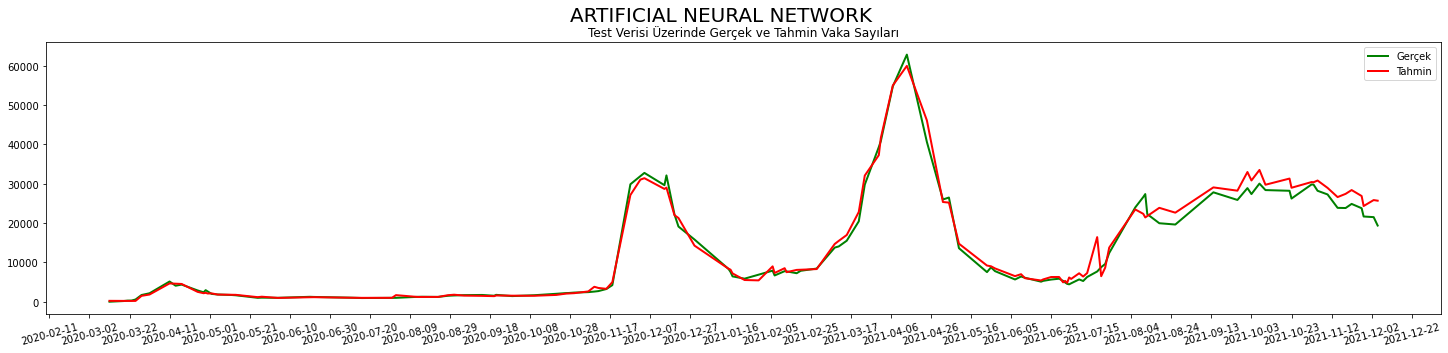

In [67]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('ARTIFICIAL NEURAL NETWORK', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 15)
ax.plot(tf_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(tf_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/Tensorflow.png')

### GRADIENT BOOSTING REGRESSOR

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
params = {'n_estimators': 500,
          'max_depth': 10,
          'min_samples_split': 20,
          'learning_rate': 0.9,
          'loss': 'ls'}

gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.9, max_depth=10, min_samples_split=20,
                          n_estimators=500)

In [70]:
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_model.predict(X_test)))
gbr_mae = mean_absolute_error(y_test, gbr_model.predict(X_test))

print("RMSE :", gbr_rmse)
print("MAE :", gbr_mae)

RMSE : 1719.1546503240932
MAE : 946.2739451009785


In [71]:
gbr_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": gbr_model.predict(X_test)}).sort_index()
gbr_tahmin_df

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,-8.162055
2020-03-19,168,99.078192
2020-03-21,277,309.753377
2020-03-23,293,294.060831
2020-03-25,561,343.516150
...,...,...
2021-11-22,24856,23676.705788
2021-11-27,23759,23390.655134
2021-11-28,21655,22581.549378


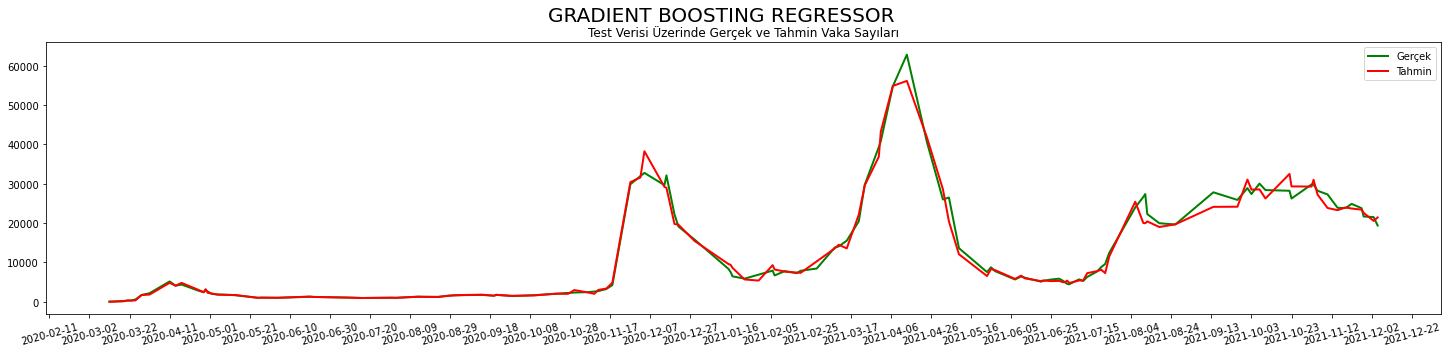

In [72]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('GRADIENT BOOSTING REGRESSOR', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 15)
ax.plot(gbr_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(gbr_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/Gradient.png')

# MODELLERİN KARŞILAŞTIRILMASI

## RMSE ve MAE Değerlerinin Karşılaştırılması

In [73]:
model_comp = pd.DataFrame({'Models': ["SARIMAX", "XGBOOST", "SKLEARN", "DESICION TREE", "GRADIENT BOOSTING", "DEEP NEURAL NETWORK"], 
                           'RMSE': [sarimax_rmse, xgb_rmse, sklearn_rmse, dt_regressor_rmse, gbr_rmse, tf_rmse],
                           'MAE': [sarimax_mae, xgb_mae, sklearn_mae, dt_regressor_mae, gbr_mae, tf_mae]})
model_comp = model_comp.sort_values(by="RMSE",axis=0, ascending = False).reset_index(drop=True)
model_comp

,Models,RMSE,MAE
0,SKLEARN,4330.625296,3183.333960
1,SARIMAX,1945.567212,1042.667551
2,DEEP NEURAL NETWORK,1912.745602,1200.837085
3,GRADIENT BOOSTING,1719.154650,946.273945
4,DESICION TREE,1595.705812,853.370079
5,XGBOOST,1499.251724,844.113853


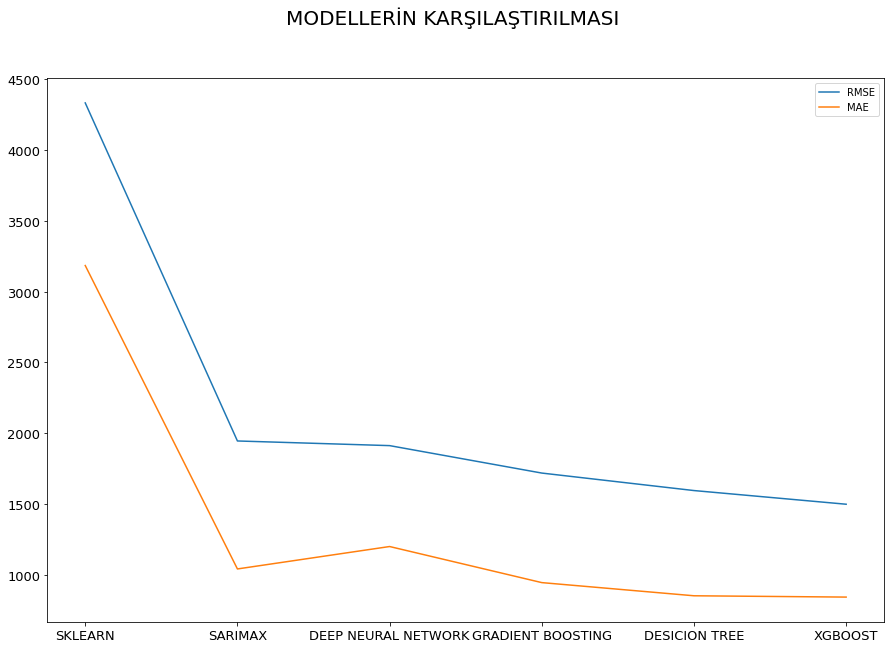

In [90]:
fig, ax = plt.subplots(figsize=(15,10))
plt.suptitle('MODELLERİN KARŞILAŞTIRILMASI', fontsize = 20)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.plot(model_comp['Models'], model_comp['RMSE'], label = "RMSE")
plt.plot(model_comp['Models'], model_comp['MAE'], label = "MAE")
plt.legend()
plt.show()

## Tahminleme Karşılaştırılması

In [75]:
frames = [xgb_tahmin_df["Gerçek Vaka Test"], pred_vaka_ci["Predicted"], xgb_tahmin_df["Tahmin Vaka Test"], 
          sklearn_tahmin_df["Tahmin Vaka Test"], dt_tahmin_df["Tahmin Vaka Test"], 
          gbr_tahmin_df["Tahmin Vaka Test"], tf_tahmin_df["Tahmin Vaka Test"]]

model_comp_ = pd.concat(frames, axis=1)
model_comp_.columns = ["Gerçek Değerler", "SARIMAX", "XGBoost", "Sklearn", "Decision Tree", "Gradient Boosting", "Deep Neural Network"]
model_comp_

,Gerçek Değerler,SARIMAX,XGBoost,Sklearn,Decision Tree,Gradient Boosting,Deep Neural Network
2020-03-12,0,1.084168,98.040909,-2715.429031,1.0,-8.162055,220.561050
2020-03-19,168,100.172369,174.510941,-2980.180281,93.0,99.078192,205.946762
2020-03-21,277,335.502446,328.514313,-3064.071976,289.0,309.753377,201.589432
2020-03-23,293,293.392071,328.514313,-3146.887040,289.0,294.060831,200.738052
2020-03-25,561,356.435218,390.296539,-3229.700563,343.0,343.516150,200.729935
...,...,...,...,...,...,...,...
2021-11-22,24856,18481.824262,24964.773438,25753.974845,24467.0,23676.705788,28375.654297
2021-11-27,23759,24895.146759,24039.212891,23174.318107,24317.0,23390.655134,26862.257812
2021-11-28,21655,23111.073803,21957.203125,18979.687194,21624.0,22581.549378,24317.984375
2021-12-03,21495,21034.261332,21599.722656,20976.306132,21624.0,20527.014642,25832.667969


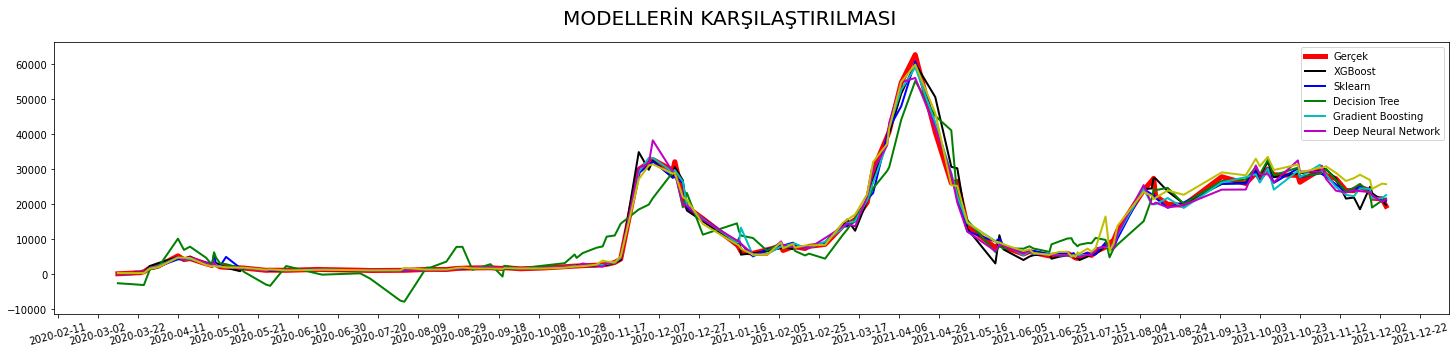

In [76]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('MODELLERİN KARŞILAŞTIRILMASI', fontsize = 20)
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 15)
ax.plot(model_comp_['Gerçek Değerler'], lw=5, color="r")
ax.plot(model_comp_['SARIMAX'], lw=2, color="k")
ax.plot(model_comp_['XGBoost'], lw=2, color="b")
ax.plot(model_comp_['Sklearn'], lw=2, color="g")
ax.plot(model_comp_['Decision Tree'], lw=2, color="c")
ax.plot(model_comp_['Gradient Boosting'], lw=2, color="m")
ax.plot(model_comp_['Deep Neural Network'], lw=2, color="y")
ax.legend(['Gerçek','XGBoost', 'Sklearn', 'Decision Tree', 'Gradient Boosting', 'Deep Neural Network'])

| ![SARIMAX](plots/SARIMAX.png) | ![XGBoost](plots/XGBoost.png)
|:---:|:---:|

| ![Sklearn](plots\Sklearn.png) | ![DecisionTree](plots\DecisionTree.png)
|:---:|:---:|

| ![Gradient](plots\Gradient.png) | ![Tensorflow](plots\Tensorflow.png)
|:---:|:---:|